# Pandas

* Pandas es un paquete de Python que implementa ciertos tipos de datos, construidos sobre `numpy`
* Los tipos básicos de Pandas son
    * Series: 1 dimensión
        * Un array 1D con etiquetas en sus ejes.
    * DataFrames: 2 dimensiones
        * Datos en formato tabular, con etiquetas en sus ejes.
    * Un DataFrame son datos tabulares (tablas)

In [1]:
import numpy
import pandas

## Series de datos

* Array 1D con etiquetas en sus ejes.
* De forma general se crean de la forma
```python
pandas.Series(data, index=index)
```

In [2]:
# Ejemplo

s = pandas.Series(range(0, 100, 10))
s

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64

In [3]:
s.values  # Saca únicamente los valores, en forma de array

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [4]:
type(s.values)

numpy.ndarray

In [5]:
s.index  ## Saca únicamente las etiquetas

RangeIndex(start=0, stop=10, step=1)

In [6]:
# Indexing, slicing
s[5]

50

In [7]:
s[5:7]

5    50
6    60
dtype: int64

* La particularidad de las `Series`, es que sus ejes están etiquetados, luego podemos indicar **el índice que queramos**.

In [8]:
pandas.Series([1, 2, 3, 4, 5],
              index=["uno", "dos", "tres", "cuatro", "cinco"])

uno       1
dos       2
tres      3
cuatro    4
cinco     5
dtype: int64

* **Lo que nos permite crear `Series` a través de diccionarios**

In [10]:
edad = {
    "maria": 25,
    "pedro": 76,
    "arturo": 80,
    "rosa": 19,
}

pandas.Series(edad) #Diccionario como argumento para construir las series

maria     25
pedro     76
arturo    80
rosa      19
dtype: int64

## DataFrame

* Un DataFrame es una representación de datos, de forma tabular, con etiquetas en los índices.
    Para crear un Dataframe se sigue esta nomenclatura: `pandas.DataFrame(data=None,index=None, columns=None, sep=None, dtype=None, copy=None)`
    
    index: nombres de las filas
    
    columns: nombres de las columnas
    
    sep=' ': indica el delimitador
    
    
* Se pueden crear de varias maneras

In [11]:
# A través de una Serie

edad = {
    "maria": 25,
    "pedro": 76,
    "arturo": 80,
    "rosa": 19,
}

edad = pandas.Series(edad)

personas = pandas.DataFrame(edad, columns=["edad"])
personas

,edad
maria,25
pedro,76
arturo,80
rosa,19


In [14]:
# A través de varias Series
#IMPORTANTE que los diccionarios tengan las mismas claves, si no incluye filas extras y NaN

edad = {
    "maria": 25,
    "pedro": 76,
    "arturo": 80,
    "rosa": 19,
}

edad = pandas.Series(edad)

altura = {
    "maria": 1.75,
    "pedro": 1.90,
    "arturo": 1.68,
    "rosa": 1.65,
}

altura = pandas.Series(altura)

personas = pandas.DataFrame({"edad": edad, "altura": altura})
personas

,edad,altura
maria,25,1.75
pedro,76,1.90
arturo,80,1.68
rosa,19,1.65


In [15]:
# A través de un diccionario

datos = {
    "altura": [1.75, 1.90, 1.68, 1.65],
    "edad": [25, 76, 80, 19],
}

nombres = ["maria", "pedro", "arturo", "rosa"]

personas = pandas.DataFrame(datos, index=nombres)
personas

,altura,edad
maria,1.75,25
pedro,1.90,76
arturo,1.68,80
rosa,1.65,19


In [17]:
# A través de un diccionario

datos = {
    "altura": [1.75, 1.90, 1.68, 1.65],
    "edad": [25, 76, 80, 19],
    "nombres": ["maria", "pedro", "arturo", "rosa"],
}


personas = pandas.DataFrame(datos)
print(personas)
personas = personas.set_index("nombres")#hace que la columna seleccionada funcione como index
personas

   altura  edad nombres
0    1.75    25   maria
1    1.90    76   pedro
2    1.68    80  arturo
3    1.65    19    rosa


,altura,edad
nombres,,
maria,1.75,25
pedro,1.90,76
arturo,1.68,80
rosa,1.65,19


In [18]:
# A través de una lista de diccionarios

datos = [
    {'altura': 1.75, 'edad': 25},
    {'altura': 1.9, 'edad': 76},
    {'altura': 1.68, 'edad': 80},
    {'altura': 1.65, 'edad': 19}
]
 
personas = pandas.DataFrame(datos, index=["maria", "pedro", "arturo", "rosa"])
personas 

,altura,edad
maria,1.75,25
pedro,1.90,76
arturo,1.68,80
rosa,1.65,19


In [20]:
# Pandas gestiona que algún dato no exista, rellenando con NaN (not a number)

edad = {
    "maria": 25,
    "pedro": 76,
    "arturo": 80,
    "rosa": 19,
    "sebastian": 17
}

edad = pandas.Series(edad)

altura = {
    "maria": 1.75,
    "pedro": 1.90,
    "arturo": 1.68,
    "rosa": 1.65,
}

altura = pandas.Series(altura)

personas = pandas.DataFrame({"edad": edad, "altura": altura})
personas

SyntaxError: invalid syntax (<ipython-input-20-8a5513548354>, line 19)

In [21]:
# A través de un fichero

data = pandas.read_csv("data/populations.txt")
data

,# year\thare\tlynx\tcarrot
0,1900\t30e3\t4e3\t48300
1,1901\t47.2e3\t6.1e3\t48200
2,1902\t70.2e3\t9.8e3\t41500
3,1903\t77.4e3\t35.2e3\t38200
4,1904\t36.3e3\t59.4e3\t40600
5,1905\t20.6e3\t41.7e3\t39800
6,1906\t18.1e3\t19e3\t38600
7,1907\t21.4e3\t13e3\t42300
8,1908\t22e3\t8.3e3\t44500
9,1909\t25.4e3\t9.1e3\t42100


In [22]:
# A través de un fichero (esta vez si)

data = pandas.read_csv("data/populations.txt", sep="\t")#Se especifica la separación entre valores
data

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


In [23]:
# A través de un fichero (todavía mejor)

data = pandas.read_csv("data/populations.txt", sep="\t", index_col=0)
data

,hare,lynx,carrot
# year,,,
1900,30000.0,4000.0,48300
1901,47200.0,6100.0,48200
1902,70200.0,9800.0,41500
1903,77400.0,35200.0,38200
1904,36300.0,59400.0,40600
1905,20600.0,41700.0,39800
1906,18100.0,19000.0,38600
1907,21400.0,13000.0,42300
1908,22000.0,8300.0,44500


## Indexing y selección de datos

### Series

* Una `Series` en `pandas` tiene similitudes con un `array` de `numpy` y un diccionario de Python, con lo que podemos realizar operaciones similares.

In [25]:
s = pandas.Series([1, 5, 2, 3, 4, 5],
                  index=["a", "b", "c", "d", "e", "f"])

In [26]:
s["a"]

1

In [27]:
"a" in s

True

In [29]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [30]:
s.values

array([1, 5, 2, 3, 4, 5])

In [31]:
# Podemos modificar

s["a"] = 10

In [32]:
# Añadir

s["z"] = 20
s

a    10
b     5
c     2
d     3
e     4
f     5
z    20
dtype: int64

In [33]:
s["a": "d"]

a    10
b     5
c     2
d     3
dtype: int64

In [ ]:
# Al igual que en numpy, podemos indexar a partir de otro array/lista

s[["a", "d"]]

In [34]:
# Y también a través de un array de booleanos

s[s > 3]

a    10
b     5
e     4
f     5
z    20
dtype: int64

* Peligro: las series tienen índices implícitos (Python, orden de los elementos) y explícitos (proporcionados por nosotros).
* Si ambos índices son enteros, puede ser una fuente de confusión.
* EJemplo

In [35]:
s = pandas.Series(["a", "b", "c", "d", "e", "f"],
                  index=[1, 3, 5, 7, 9, 11])
s

1     a
3     b
5     c
7     d
9     e
11    f
dtype: object

In [36]:
s[3]  # 'b', índice explícito cuando se accede a un elemento

'b'

In [39]:
s[3:5]  # ['d', 'e'], índice implícito de Python al hacer Slicing

7    d
9    e
dtype: object

* Para solucionar estas ambiguedades, Pandas ofrece dos interfaces para los índices explícitos e implícitos: `.loc` y `.iloc`

In [ ]:
s.loc[3]  # Explícito

In [ ]:
s.loc[3:5]  # Explícito

In [ ]:
s.iloc[3]  # Implícito

In [ ]:
s.iloc[3:5]  # Implícito

### DataFrame

* Para simplificar, podemos considerar un DataFrame como un diccionario de Series (columnas)

In [40]:
# Pandas gestiona que algún dato no exista, rellenando con NaN (not a number)

edad = {
    "maria": 25,
    "pedro": 76,
    "arturo": 80,
    "rosa": 19,
    "marta": 33,
    "juan": 77,
    "sebastian": 17
}

edad = pandas.Series(edad)

altura = {
    "maria": 1.75,
    "pedro": 1.90,
    "arturo": 1.68,
    "rosa": 1.65,
    "marta": 1.70,
    "juan": 1.84,
}

altura = pandas.Series(altura)

peso = {
    "maria": 62,
    "pedro": 122,
    "arturo": 75,
    "rosa": 64,
    "marta": 55,
    "juan": 70,
}

peso = pandas.Series(peso)

personas = pandas.DataFrame({"edad": edad, "altura": altura, "peso": peso})
personas

,edad,altura,peso
arturo,80,1.68,75.0
juan,77,1.84,70.0
maria,25,1.75,62.0
marta,33,1.70,55.0
pedro,76,1.90,122.0
rosa,19,1.65,64.0
sebastian,17,NaN,NaN


In [41]:
# Puedo acceder a las columnas directamente

personas["edad"]

arturo       80
juan         77
maria        25
marta        33
pedro        76
rosa         19
sebastian    17
Name: edad, dtype: int64

In [42]:
# O bien 

personas.edad

arturo       80
juan         77
maria        25
marta        33
pedro        76
rosa         19
sebastian    17
Name: edad, dtype: int64

In [43]:
# Tambien podemos añadir y realizar operaciones element-wise

personas["imc"] = personas["peso"] / (personas["altura"]**2)
personas

,edad,altura,peso,imc
arturo,80,1.68,75.0,26.573129
juan,77,1.84,70.0,20.675803
maria,25,1.75,62.0,20.244898
marta,33,1.70,55.0,19.031142
pedro,76,1.90,122.0,33.795014
rosa,19,1.65,64.0,23.507805
sebastian,17,NaN,NaN,NaN


* *Pero*, la estructura de un DataFrame son Series, que en esencia son arrays.
* Se puede acceer al array a través del atributo `.values`.

In [ ]:
personas.values

In [ ]:
# Accedo a la fila 0

personas.values[0]

In [ ]:
# Accedo a la columna 0

personas.values[:, 0]

* Un DataFrame también tiene índices explícitos e implícitos, a los que se accede también a través de `.iloc` y `.loc`.

In [44]:
personas.iloc[1:4]  # Indice implícito

,edad,altura,peso,imc
juan,77,1.84,70.0,20.675803
maria,25,1.75,62.0,20.244898
marta,33,1.70,55.0,19.031142


In [45]:
personas.iloc[1:4, 2:4]  # Indice implícito

,peso,imc
juan,70.0,20.675803
maria,62.0,20.244898
marta,55.0,19.031142


In [46]:
personas.loc["maria": "rosa"]  # Indice explícito

,edad,altura,peso,imc
maria,25,1.75,62.0,20.244898
marta,33,1.70,55.0,19.031142
pedro,76,1.90,122.0,33.795014
rosa,19,1.65,64.0,23.507805


In [47]:
personas.loc["maria": "rosa", "peso": "imc"]  # Indice explícito

,peso,imc
maria,62.0,20.244898
marta,55.0,19.031142
pedro,122.0,33.795014
rosa,64.0,23.507805


* Esto nos permite utilizar todas las formas de indexing de `numpy`!

In [48]:
personas.loc[personas["imc"] > 25]

,edad,altura,peso,imc
arturo,80,1.68,75.0,26.573129
pedro,76,1.90,122.0,33.795014


## Plotting

In [49]:
import matplotlib
%matplotlib inline

<AxesSubplot:>

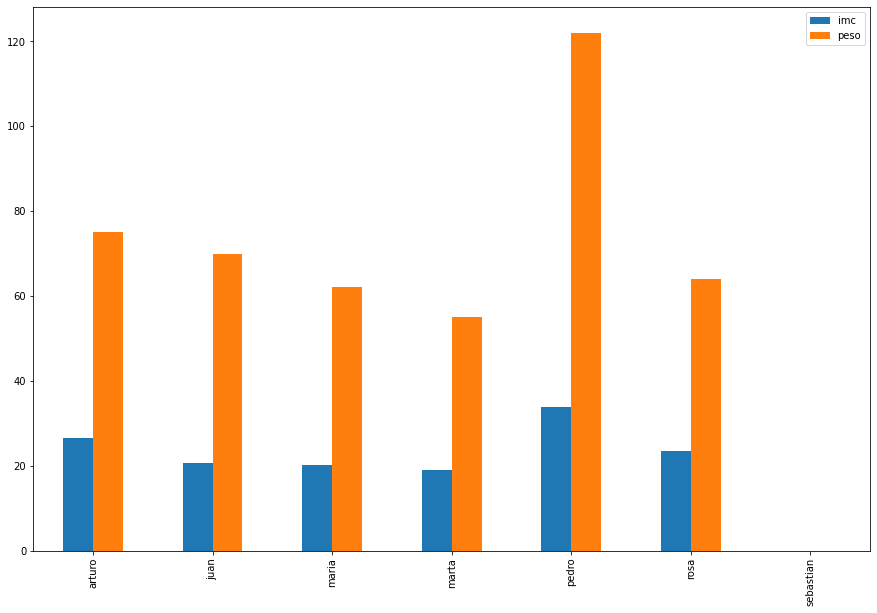

In [51]:
personas[["imc", "peso"]].plot(kind="bar", figsize=(15,10))

<AxesSubplot:xlabel='# year'>

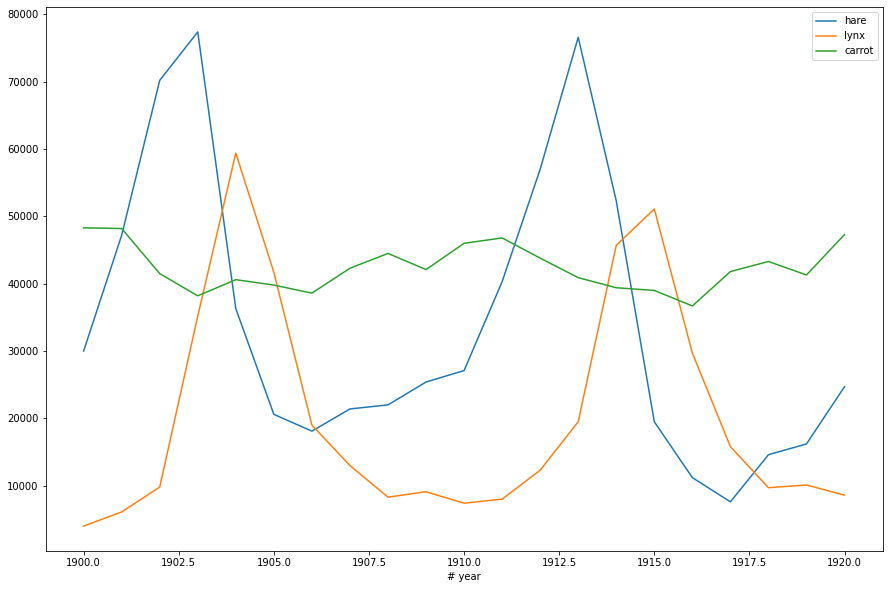

In [52]:
data.plot(figsize=(15,10))